In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = pd.DataFrame(duplicate_mice)
duplicate_mice_df.head()

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = merged_df[merged_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())


249

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
regimen_mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumour Volume (mm3)"]
regimen_median = clean_df.groupby(["Drug Regimen"]).median()["Tumour Volume (mm3)"]
regimen_variance = clean_df.groupby(["Drug Regimen"]).var()["Tumour Volume (mm3)"]
regimen_std = clean_df.groupby(["Drug Regimen"]).std()["Tumour Volume (mm3)"]
regimen_sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumour Volume (mm3)"]


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
summary_statistics_df = pd.DataFrame({
    "Mean" : regimen_mean, 
    "Median" : regimen_median, 
    "Variance" : regimen_variance,
    "Standar Deviation" : regimen_std, 
    "SEM" : regimen_sem
})

summary_statistics_df

,Mean,Median,Variance,Standar Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_summary_statistics = clean_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumour Volume (mm3)"]
single_summary_statistics

/var/folders/xf/01g48_5x00s10nr48ybntfxc0000gn/T/ipykernel_19127/1688811220.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  single_summary_statistics = clean_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumour Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Timepoints')

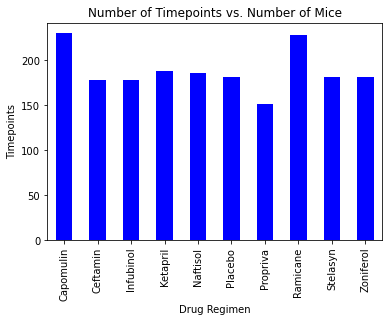

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_mice_per_drug = clean_df.groupby('Drug Regimen').count()['Timepoint']

pandas_figure = count_mice_per_drug.plot(kind="bar", facecolor="blue", figsize=(6,4),
                                title="Number of Timepoints vs. Number of Mice")

pandas_figure.set_xlabel("Drug Regimen")
pandas_figure.set_ylabel("Timepoints")


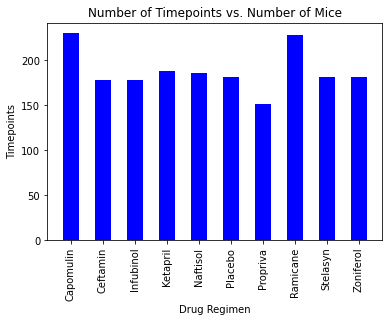

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(count_mice_per_drug))
# plt(figsize=(8, 6), dpi=80)
plt.bar(x_axis, count_mice_per_drug, color='blue', align="center", width=0.5)

plt.title("Number of Timepoints vs. Number of Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

plt.show()

Text(0, 0.5, 'Sex')

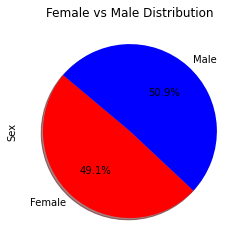

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_male_female = clean_df.groupby('Sex').count()['Mouse ID']
pandas_pie_figure = mice_male_female.plot(kind="pie", figsize=(6,4), colors = ["red", "blue"],
                                title="Female vs Male Distribution", shadow=True, startangle=140, autopct="%1.1f%%")

pandas_pie_figure.set_ylabel("Sex")


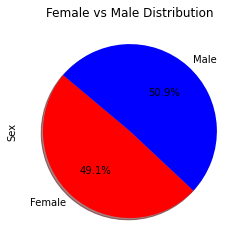

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_male_female, labels=["Female", "Male"], colors=["red", "blue"],
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Female vs Male Distribution")
plt.ylabel("Sex")
plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max = clean_df.groupby('Mouse ID').max()['Timepoint']
timepoint_max_df = pd.DataFrame(timepoint_max)
merged_df = pd.merge(timepoint_max_df, clean_df, on=("Mouse ID", "Timepoint"), how="left")
merged_df
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)
tumour_data = []

    


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
for value in treatments:
    final_tumor = clean_df.loc[clean_df["Drug Regimen"] == value,"Tumour Volume (mm3)"]
    
    # add subset 
    tumour_data.append(final_tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25, .5, .75])
    lower_quartile = quartiles[.25]
    upper_quartile = quartiles[.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)

print(f"The lower quartile is: {lower_quartile}")
print(f"The upper quartile is: {upper_quartile}")
print(f"The inter quartile range is: {iqr}")
print(f"The lower bound is: {lower_bound}")
print(f"The upper bound is: {upper_bound}")

The lower quartile is: 47.2084271125
The upper quartile is: 56.801437570000004
The inter quartile range is: 9.593010457500007
The lower bound is: 32.81891142624998
The upper bound is: 71.19095325625001


(10.0, 80.0)

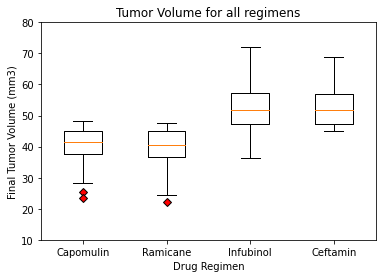

In [15]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for all regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
red_diamond = dict(markerfacecolor='r', marker='D')
ax1.boxplot(tumour_data, labels=treatments, flierprops=red_diamond)

plt.ylim(10, 80)

In [16]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


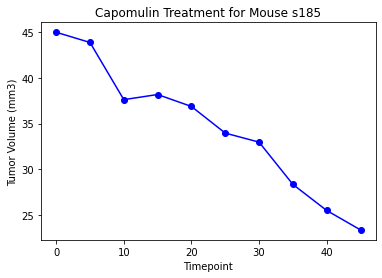

In [17]:
line_chart = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]

plt.plot(line_chart["Timepoint"], line_chart["Tumour Volume (mm3)"], color="blue", marker="o")
plt.title("Capomulin Treatment for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

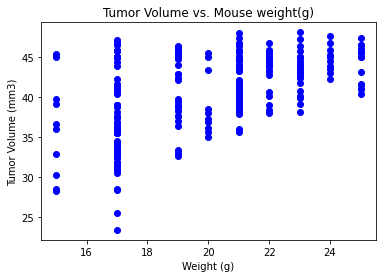

In [18]:
# Generate a scatter plot of tumour volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulin_df["Weight (g)"], capomulin_df["Tumour Volume (mm3)"], color="blue", marker="o")
plt.title("Tumor Volume vs. Mouse weight(g)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

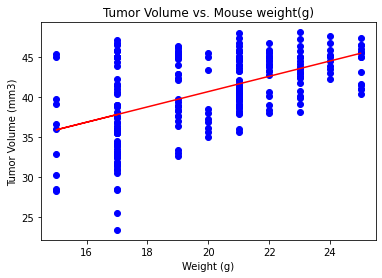

0.525699555207717

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_df["Weight (g)"], capomulin_df["Tumour Volume (mm3)"])[0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_df["Weight (g)"], capomulin_df["Tumour Volume (mm3)"])

regress_values = capomulin_df["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_df["Weight (g)"], capomulin_df["Tumour Volume (mm3)"], color="blue", marker="o")
plt.plot(capomulin_df["Weight (g)"] ,regress_values,"r-")

plt.annotate(line_eq,(0.8,5.4),fontsize=15,color="red")

plt.title("Tumor Volume vs. Mouse weight(g)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
rvalue